# McDonalds

## Numpy

In [138]:
import numpy as np
from urllib import request
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

In [137]:
n = len(dataset)
X_con_unos = np.zeros(shape=(n, 2))
X = np.zeros(n)
Y = np.zeros(n)

for i in range(0, n):
  X_con_unos[i][0] = 1
  X_con_unos[i][1] = dataset[i][0]
  X[i] = dataset[i][0]
  Y[i] = dataset[i][1]

In [139]:
X_daga = np.linalg.pinv(X_con_unos)

(b,w) = np.matmul(X_daga, Y)
print(f'b = {b}')
print(f'w = {w}')

b = -3.895780878311854
w = 1.1930336441895937


In [140]:
def ecm(X,Y):
  return ((X - Y)**2).mean()

def regresor(x):
  return x*w+b

print(ecm(regresor(X), Y))

8.953942751950358


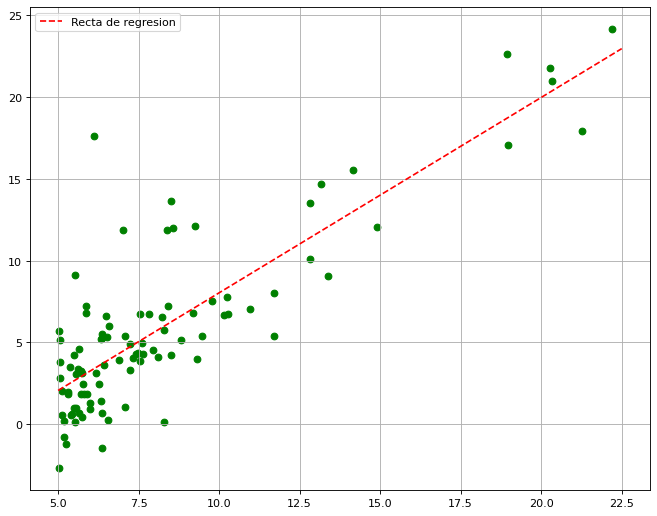

In [141]:
x = np.linspace(5, 22.5, num=200)
y = regresor(x)

plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.scatter(x=X, y=Y, color="green")
plt.plot(x, y, color='red', linestyle='dashed', label='Recta de regresion')
plt.legend(loc='upper left')
plt.show()

In [53]:
print(regresor(3.5))

0.2798368763517236


Text(0.5, 0, 'cost')

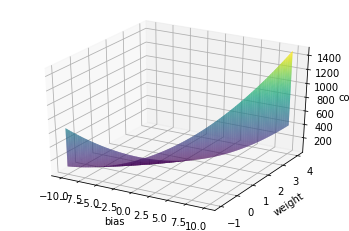

In [143]:
pts = 100
theta0_vals = np.linspace(-10, 10, pts)
theta1_vals = np.linspace(-1, 4, pts)
J_vals = np.zeros([pts,pts])
for i in range(pts):
    for j in range(pts):
      t = np.r_[theta0_vals[i], theta1_vals[j]]
      J_vals[i,j] = np.mean((np.dot(X_con_unos,t)-dataset[:,1])**2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('bias')
ax.set_ylabel('weight')
ax.set_zlabel('cost')

## Keras y TensorFlow

In [54]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='MeanSquaredError')
hist = model.fit(x=X, y=Y, batch_size = n, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 215ms/step - loss: 456.5781
Epoch 2/100000
1/1 [==============================] - 0s 5ms/step - loss: 196.6647
Epoch 3/100000
1/1 [==============================] - 0s 6ms/step - loss: 88.6978
Epoch 4/100000
1/1 [==============================] - 0s 5ms/step - loss: 43.8414
Epoch 5/100000
1/1 [==============================] - 0s 5ms/step - loss: 25.1977
Epoch 6/100000
1/1 [==============================] - 0s 5ms/step - loss: 17.4416
Epoch 7/100000
1/1 [==============================] - 0s 5ms/step - loss: 14.2075
Epoch 8/100000
1/1 [==============================] - 0s 5ms/step - loss: 12.8518
Epoch 9/100000
1/1 [==============================] - 0s 5ms/step - loss: 12.2764
Epoch 10/100000
1/1 [==============================] - 0s 5ms/step - loss: 12.0251
Epoch 11/100000
1/1 [==============================] - 0s 5ms/step - loss: 11.9086
Epoch 12/100000
1/1 [==============================] - 0s 5ms/step - loss: 11.8481
Epoch 13/

In [56]:
losses = np.array(hist.history['loss'])
params = model.get_weights()
prediction = model.predict(x=np.array([3.5]))

b = params[1][0]
w = params[0][0][0]

print(f'b = {b}')
print(f'w = {w}')
print(f'ecm = {ecm(regresor(X),Y)}')
print(f'Ganancias para 35K: {regresor(3.5)}')


b = -3.8633646965026855
w = 1.189777135848999
ecm = 8.954134081938715
Ganancias para 35K: 0.30085527896881104


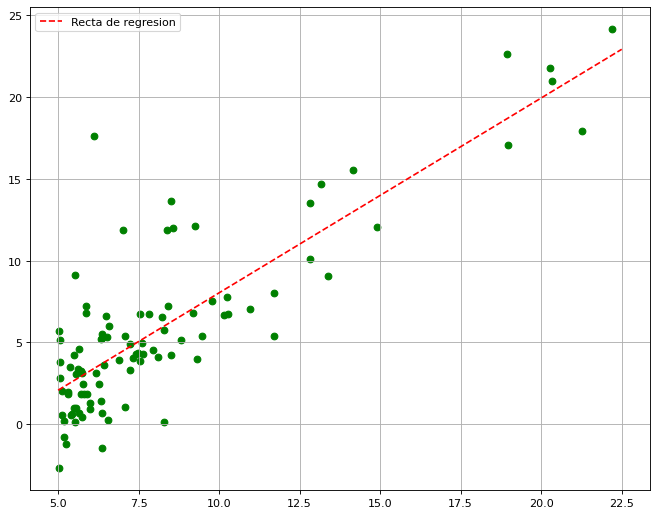

In [57]:
x = np.linspace(5, 22.5, num=200)
y = regresor(x)

plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.scatter(x=X, y=Y, color="green")
plt.plot(x,y, color='red', linestyle='dashed', label='Recta de regresion')
plt.legend(loc='upper left')
plt.show()

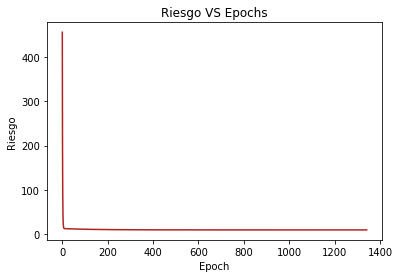

In [58]:
plt.plot(losses, color="firebrick")
plt.title('Riesgo VS Epochs')
plt.ylabel('Riesgo')
plt.xlabel('Epoch')
plt.show()

In [59]:
lambda_min, lambda_max = np.linalg.eigvals(np.matmul(X_con_unos.T,  X_con_unos))

LR_optimo = n/(lambda_min + lambda_max)
LR_optimo

0.01213534165664063

# Inmobiliaria

## Numpy

In [60]:
import numpy as np
from urllib import request
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/inmobiliaria.txt"
f = request.urlopen(url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")
dataset

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [61]:
n = len(dataset)
X_con_unos = np.zeros(shape=(n, 3))
X = np.zeros(shape=(n, 2))
Z = np.zeros(n)

for i in range(0, n):
  X_con_unos[i][0] = 1
  X_con_unos[i][1] = dataset[i][0]
  X_con_unos[i][2] = dataset[i][1]
  X[i][0] = dataset[i][0]
  X[i][1] = dataset[i][1]
  Z[i] = dataset[i][2]

In [62]:
X_daga = np.linalg.pinv(X_con_unos)

(b,w1, w2) = np.matmul(X_daga, Z)
print(f'b = {b}')
print(f'w1 = {w1}')
print(f'w2 = {w2}')

b = 89597.90954279754
w1 = 139.21067401762548
w2 = -8738.019112327838


In [63]:
def ecm(X,Y):
  return ((X - Y)**2).mean()

def regresor(x,y):
  return x*w1+y*w2+b

print(ecm(regresor(X[:,0], X[:,1]), Z))

4086560101.205656


In [64]:
print(regresor(1650, 3))

293081.46433489607


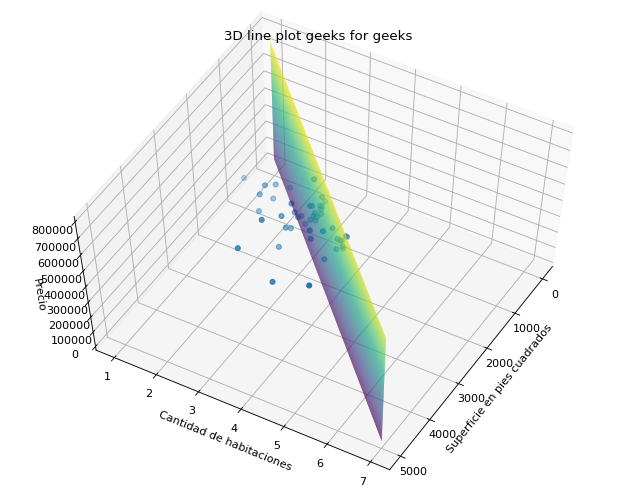

In [65]:
pts = 200
x = np.linspace(0, 5000, num=pts)
y = np.linspace(1, 7, num=pts)
z = np.zeros([pts, pts])
for i in range(0, len(x)):
  for j in range(0, len(y)):
    z[i][j] = regresor(x[i], y[j])

plt.figure(figsize=(10, 8), dpi=80)
ax = plt.axes(projection ='3d')
ax.view_init(elev=60, azim=30)
ax.set_xlabel('Superficie en pies cuadrados')
ax.set_ylabel('Cantidad de habitaciones')
ax.set_zlabel('Precio')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.scatter3D(X[:,0], X[:,1], Z)
ax.set_title('3D line plot geeks for geeks')
plt.show()

## Tensorflow y Keras

In [115]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.summary()

n = len(dataset)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [114]:
def normalizar_datos(X):
  return (X - X.mean(axis = 0))/X.std(axis = 0)
  

X_normalizado = normalizar_datos(X)

In [116]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss='MeanSquaredError')
hist = model.fit(x=X_normalizado, y=Z, batch_size = n, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 207ms/step - loss: 131183435776.0000
Epoch 2/100000
1/1 [==============================] - 0s 6ms/step - loss: 7603511808.0000
Epoch 3/100000
1/1 [==============================] - 0s 6ms/step - loss: 5189347328.0000
Epoch 4/100000
1/1 [==============================] - 0s 5ms/step - loss: 4432353792.0000
Epoch 5/100000
1/1 [==============================] - 0s 6ms/step - loss: 4194988544.0000
Epoch 6/100000
1/1 [==============================] - 0s 6ms/step - loss: 4120559360.0000
Epoch 7/100000
1/1 [==============================] - 0s 6ms/step - loss: 4097220864.0000
Epoch 8/100000
1/1 [==============================] - 0s 6ms/step - loss: 4089902592.0000
Epoch 9/100000
1/1 [==============================] - 0s 5ms/step - loss: 4087608320.0000
Epoch 10/100000
1/1 [==============================] - 0s 8ms/step - loss: 4086889216.0000
Epoch 11/100000
1/1 [==============================] - 0s 5ms/step - loss: 4086663936.0000
Epoc

In [113]:
losses = np.array(hist.history['loss'])
params = model.get_weights()
prediction = model.predict(x=np.array([1650, 3])[None, :])

b = params[1][0]
w1 = params[0][0][0]
w2 = params[0][1][0]

print(f'b = {b}')
print(f'w1 = {w1}')
print(f'w2 = {w2}')
print(f'ecm = {ecm(regresor(X[:,0], X[:,1]),Z)}')
print(f'Precio esperado para 1650 sq-ft y 3 habitaciones = {regresor(1650, 3)}')

b = 340412.65625
w1 = 109440.7890625
w2 = -6571.3486328125
ecm = 5.5317321109362136e+16
Precio esperado para 1650 sq-ft y 3 habitaciones = 180898000.56347656


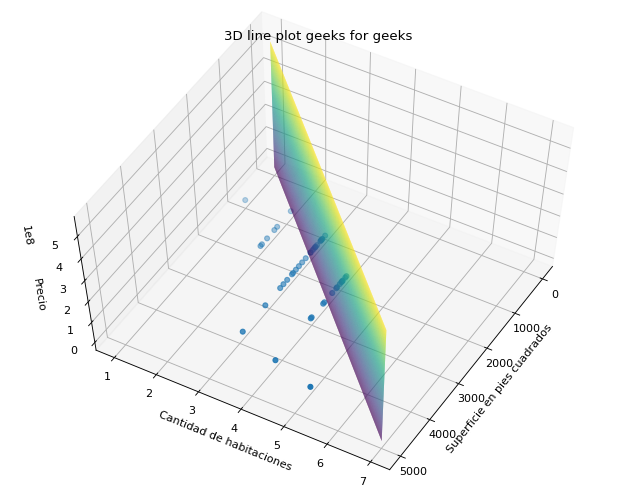

In [97]:
pts = 200
x = np.linspace(0, 5000, num=pts)
y = np.linspace(1, 7, num=pts)
z = np.zeros([pts, pts])
for i in range(0, len(x)):
  for j in range(0, len(y)):
    z[i][j] = regresor(x[i], y[j])

plt.figure(figsize=(10, 8), dpi=80)
ax = plt.axes(projection ='3d')
ax.view_init(elev=60, azim=30)
ax.set_xlabel('Superficie en pies cuadrados')
ax.set_ylabel('Cantidad de habitaciones')
ax.set_zlabel('Precio')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.scatter3D(X[:,0], X[:,1], Z)
ax.set_title('3D line plot geeks for geeks')
plt.show()

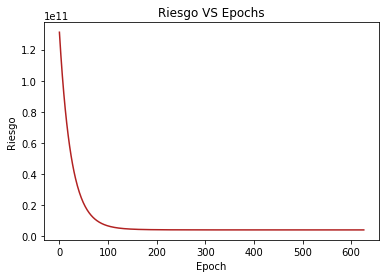

In [96]:
plt.plot(losses, color="firebrick")
plt.title('Riesgo VS Epochs')
plt.ylabel('Riesgo')
plt.xlabel('Epoch')
plt.show()

In [127]:
X_normalizado_con_unos = np.c_[np.ones(len(X_normalizado)), X_normalizado]

autovalores = np.linalg.eigvals(X_normalizado_con_unos.T@X_normalizado_con_unos)

lambda_min = autovalores.min()
lambda_max = autovalores.max()

LR_optimo = n/(lambda_min + lambda_max)
LR_optimo

0.5000000000000003